In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import jieba
from collections import Counter
import jieba.posseg as jp
from PIL import Image
from matplotlib import style
import seaborn as sns
# from ggplot import *
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
comments_df = pd.read_csv(r'./data/合并后的评论数据_TOP20.csv')
comments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42775 entries, 0 to 42774
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                42775 non-null  int64  
 1   guid              42775 non-null  object 
 2   content           42775 non-null  object 
 3   creationTime      42775 non-null  object 
 4   isDelete          42775 non-null  bool   
 5   isTop             42775 non-null  bool   
 6   userImageUrl      42775 non-null  object 
 7   topped            42775 non-null  int64  
 8   replyCount        42775 non-null  int64  
 9   score             42775 non-null  int64  
 10  imageStatus       30654 non-null  float64
 11  usefulVoteCount   42775 non-null  int64  
 12  userClient        42775 non-null  int64  
 13  discussionId      31354 non-null  float64
 14  imageCount        30654 non-null  float64
 15  anonymousFlag     39515 non-null  float64
 16  plusAvailable     42775 non-null  int64 

In [3]:
comments_df.head()

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,afterUserComment,afterImages,afterVideos,SKU,sales_order,Title,Description,Price,Image,Shop
0,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
1,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
2,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
3,19070214247,b50c44c34f184dee37a47ec15a80931e,喜欢京东的物流，快速而便捷，最迟第二天就到货，而且直接送到家里，非常便利。\n\n这次买的西...,2023-04-30 11:50:21,False,False,storage.360buyimg.com/i.imageUpload/6d6172696f...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
4,19069676284,3d6089a2c4f3d1f05cc54ee1085617f7,夏天到了，就想吃一些好吃的水果，就在京东自营水果店里买了一些水果，水果包装的都很好，水果吃起...,2023-04-30 07:51:10,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区


In [41]:
# 查看不同评分的评价
comments_df.loc[comments_df.score == 4]

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,afterVideos,SKU,sales_order,Title,Description,Price,Image,Shop,sale_month,sale_year
129,19089817627,74b99c26170229238a3872524a943e28,包装挺好的，没有磕伤，物流也很快！昨天打开吃了一下！感觉中规中矩，感觉还不错，甜也蛮甜，但还...,2023-05-07 12:56:54,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,4,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023
138,19070162247,63108704adc68a8b37a47ec15a80931e,终于吃到了传说中的梦中情瓜，皮比我想象中还要薄！口感不错，脆甜，美中不足的是，气泡柱还需要再...,2023-04-30 11:30:54,False,False,storage.360buyimg.com/i.imageUpload/707265616c...,0,0,4,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
150,19045297930,d81e6976c3ff5f93e1ba216316ead034,现在吃西瓜不便宜。送货挺快，就是浑身伤痕累累，裂口好几条。还是等几个月西瓜大量上市再说吧。。...,2023-04-22 18:03:27,False,False,storage.360buyimg.com/i.imageUpload/bba2c2e4c6...,0,0,4,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
339,18668386967,049271f3af3d6af62b39afd2bf1cb8e7,挺好吃的，嗓子疼的期间冰镇以后吃，有缓解作用。喝水喝不了，吃西瓜也可以替代，还是发挥了很大作...,2023-01-08 16:03:00,False,False,storage.360buyimg.com/i.imageUpload/b4edb9fd64...,0,0,4,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,01,2023
1406,19084618978,5ea33c53a1b0d70d14e68d4801cfe865,买了三个，重量都是够的，但是明显有一个很生，不甜。其余两个没有问题，熟也够甜。买个瓜跟开盲盒...,2023-05-05 16:14:44,False,False,storage.360buyimg.com/i.imageUpload/6a645f5559...,0,0,4,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42556,19090271424,36da7ee5c126f5fc4e6aff458f6c48e8,硬而不甜,2023-05-07 15:40:02,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,4,...,NaN,4014101,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023
42675,19089948206,07606e323c2dd74241f9c1444036e6a7,还可以吧，瓜藤处发黑的，估计放的时间蛮长了。甜度可以。,2023-05-07 13:43:34,False,False,storage.360buyimg.com/i.imageUpload/6a645f6159...,0,0,4,...,NaN,4014101,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023
42677,19089817627,74b99c26170229238a3872524a943e28,包装挺好的，没有磕伤，物流也很快！昨天打开吃了一下！感觉中规中矩，感觉还不错，甜也蛮甜，但还...,2023-05-07 12:56:54,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,4,...,NaN,4014101,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023
42709,19084618978,5ea33c53a1b0d70d14e68d4801cfe865,买了三个，重量都是够的，但是明显有一个很生，不甜。其余两个没有问题，熟也够甜。买个瓜跟开盲盒...,2023-05-05 16:14:44,False,False,storage.360buyimg.com/i.imageUpload/6a645f5559...,0,0,4,...,NaN,4014101,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023


In [113]:
# 不同评分的数量
score_num = comments_df.groupby(['score']).agg('count')['id']
score_num = score_num.sort_values(ascending=False)
score_num

score
5    33372
1     4443
3     3000
2     1420
4      540
Name: id, dtype: int64

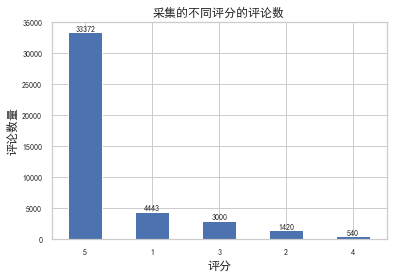

In [135]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)
# 创建条形图
ax = score_num.plot(x='socre', y='id', kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(score_num):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('采集的不同评分的评论数')
plt.xlabel('评分')
plt.ylabel('评论数量')
# 显示 x 轴和 y 轴
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/评分的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [35]:
# 不同SKU的评分
comments_df.groupby(['SKU','sales_order']).agg({'score':'mean'}).sort_index(level='sales_order')

,,score
SKU,sales_order,
4014101,1,4.329902
10028804239779,2,4.329902
100055936077,3,4.330215
10070743806818,4,4.332086
100001809857,5,4.332086
100010235018,6,4.332086
10071528305086,7,4.332398
7384607,8,4.332398
100057637967,9,4.332398


In [93]:
# 分省查看
province_df = comments_df.loc[comments_df['location']!='美国'].groupby(['location','score']).agg({'id':'count'}).sort_values(['location','score'],ascending=False)
# province_df.reset_index(inplace=True)
province_df

id
location score      
青海       5        40
陕西       5       540
         1       100
重庆       5        60
         4        60
...              ...
上海       5      3200
         4        60
         3       760
         2       180
         1       740

[94 rows x 1 columns]

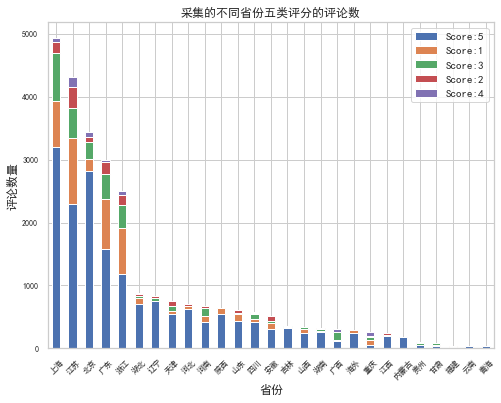

In [134]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)
# 设置图表大小
fig, ax = plt.subplots(figsize=(8, 5))
# 对数据进行分组和求和
grouped = province_df.unstack()

# 按照数值大小进行排序
grouped = grouped.reindex(grouped.sum().sort_values(ascending=False).index, axis=1)

# 按照城市的总评论数量进行排序
sorted_cities = grouped.sum(axis=1).sort_values(ascending=False).index
grouped = grouped.reindex(sorted_cities)

# 绘制堆叠图
stacked = grouped.plot(kind='bar', stacked=True, figsize=(8, 6),ax=ax)

# 添加标题和坐标轴标签
plt.title('采集的不同省份五类评分的评论数')
plt.xlabel('省份')
plt.ylabel('评论数量')

# 修改图例
handles, labels = stacked.get_legend_handles_labels()
new_labels = [f'Score:{label[-2]}' for label in labels]
stacked.legend(handles, new_labels, loc='upper right')

# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=45, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/不同省份五类评分的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [115]:
# 分日期查看
comments_df['sale_month'] = comments_df['creationTime'].str.slice(5,7)
comments_df['sale_year'] = comments_df['creationTime'].str.slice(0,4)
comments_df.head()

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,afterVideos,SKU,sales_order,Title,Description,Price,Image,Shop,sale_month,sale_year
0,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
1,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
2,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023
3,19070214247,b50c44c34f184dee37a47ec15a80931e,喜欢京东的物流，快速而便捷，最迟第二天就到货，而且直接送到家里，非常便利。\n\n这次买的西...,2023-04-30 11:50:21,False,False,storage.360buyimg.com/i.imageUpload/6d6172696f...,0,0,5,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023
4,19069676284,3d6089a2c4f3d1f05cc54ee1085617f7,夏天到了，就想吃一些好吃的水果，就在京东自营水果店里买了一些水果，水果包装的都很好，水果吃起...,2023-04-30 07:51:10,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023


In [118]:
# 将日期字符串转换为日期对象
comments_df['date'] = pd.to_datetime(comments_df['creationTime'])

# 创建星期几的新列
comments_df['weekday'] = comments_df['date'].apply(lambda x: x.weekday()+1)
comments_df

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,sales_order,Title,Description,Price,Image,Shop,sale_month,sale_year,date,weekday
0,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-28 14:18:46,5
1,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-16 17:22:49,7
2,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,05,2023,2023-05-10 12:35:07,3
3,19070214247,b50c44c34f184dee37a47ec15a80931e,喜欢京东的物流，快速而便捷，最迟第二天就到货，而且直接送到家里，非常便利。\n\n这次买的西...,2023-04-30 11:50:21,False,False,storage.360buyimg.com/i.imageUpload/6d6172696f...,0,0,5,...,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-30 11:50:21,7
4,19069676284,3d6089a2c4f3d1f05cc54ee1085617f7,夏天到了，就想吃一些好吃的水果，就在京东自营水果店里买了一些水果，水果包装的都很好，水果吃起...,2023-04-30 07:51:10,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区,04,2023,2023-04-30 07:51:10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42770,19074860106,444beee74a8aa8e1d4e6f389a9c936de,夏天终于快到了，又是吃西瓜的季节了。京东的西瓜总体很满意，瓜瓤鲜脆，很甜，就像是刚从地里摘出...,2023-05-02 10:25:26,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023,2023-05-02 10:25:26,2
42771,19074863148,250c09c1aa6896efaf0ccc340b1146d8,夏天终于快到了，又是吃西瓜的季节了。京东的西瓜总体很满意，瓜瓤鲜脆，很甜，就像是刚从地里摘出...,2023-05-02 10:23:56,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023,2023-05-02 10:23:56,2
42772,19074847580,10ba9684af87e4ec365bb1b092dacc46,收到时西瓜摔了，吃的时候已经有味道了。,2023-05-02 10:19:56,False,False,storage.360buyimg.com/i.imageUpload/6a645f3435...,0,0,5,...,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023,2023-05-02 10:19:56,2
42773,19074702565,ba42dfb7d6b668e0df29904d6c4240b5,收到时西瓜摔了，吃的时候已经有味道了。,2023-05-02 09:27:10,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,1,绿衣裹红瓤，果味清新甘甜，果肉鲜脆多汁，喷涌汁液清甜入喉，甜蜜直达心田！,\n京鲜生 国产麒麟西瓜 1粒装 单果2.5kg以上 生鲜水果,39.9,//img11.360buyimg.com/n7/jfs/t1/220542/36/7792...,水果京东自营专区,05,2023,2023-05-02 09:27:10,2


In [125]:
# 按年统计
year_df = comments_df.value_counts(['sale_year'],ascending=True)
year_df

sale_year
2018           420
2019          2620
2020          3080
2021          3800
2022          3920
2023         28935
dtype: int64

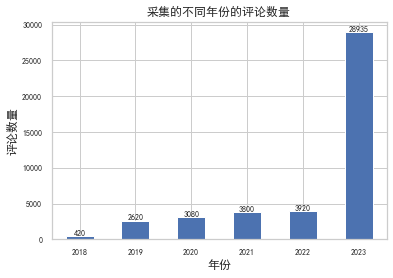

In [136]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)

# 创建条形图
ax = year_df.plot(x='sale_year', y='data', kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(year_df):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('采集的不同年份的评论数量')
plt.xlabel('年份')
plt.ylabel('评论数量')

# 设置 x 轴刻度和标签
plt.xticks(range(len(year_df)), ['2018', '2019', '2020', '2021', '2022', '2023'])
# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/年份的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [149]:
# 月份绘图
month_df = comments_df.loc[comments_df.sale_year != '2023'].value_counts(['sale_month'])
month_df = month_df.reset_index()
month_df

,sale_month,0
0,07,2160
1,06,1840
2,08,1660
3,12,1340
4,05,1280
5,04,1140
6,11,1100
7,03,940
8,10,700
9,02,640


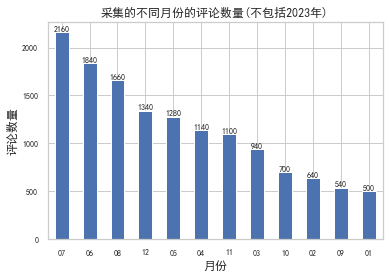

In [157]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)

# 创建条形图
ax = month_df.plot(x='sale_month', y=0, kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(month_df[0]):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('采集的不同月份的评论数量(不包括2023年)')
plt.xlabel('月份')
plt.ylabel('评论数量')


# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# 隐藏图例
ax.legend().set_visible(False)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/不同月份的评论数量.svg',dpi=300)
# 显示图形
plt.show()

In [159]:
# 周几绘图
week_df = comments_df.loc[comments_df.sale_year != '2023'].value_counts(['weekday'])
week_df = week_df.reset_index()
week_df

,weekday,0
0,5,2320
1,6,2280
2,1,2120
3,3,2000
4,2,1840
5,7,1740
6,4,1540


In [162]:
week_df.weekday

0    5
1    6
2    1
3    3
4    2
5    7
6    4
Name: weekday, dtype: int64

In [168]:
week_df['weekday'].astype(str).map(weekday_dict)

0    星期五
1    星期六
2    星期一
3    星期三
4    星期二
5    星期天
6    星期四
Name: weekday, dtype: object

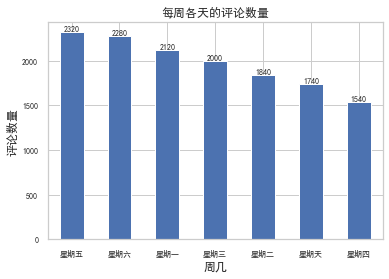

In [171]:
# 设置 seaborn 主题样式
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='whitegrid', rc=rc)

# 创建星期几的字典映射
weekday_dict = {
    '1': '星期一',
    '2': '星期二',
    '3': '星期三',
    '4': '星期四',
    '5': '星期五',
    '6': '星期六',
    '7': '星期天'
}
# 创建条形图
ax = week_df.plot(x='weekday', y=0, kind='bar')
# 在每个条形上方显示具体的数字
for i, v in enumerate(week_df[0]):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=8)

# 添加标题和坐标轴标签
plt.title('每周各天的评论数量')
plt.xlabel('周几')
plt.ylabel('评论数量')
# 将x轴的标签替换为星期几
# 设置 x 轴刻度和标签
plt.xticks(range(len(week_df)), week_df['weekday'].astype(str).map(weekday_dict))

# 设置 x 轴和 y 轴的标签可见性
ax.tick_params(axis='x', labelrotation=0, labelsize=8)
ax.tick_params(axis='y', labelsize=8)

# 隐藏图例
ax.legend().set_visible(False)
# 设置背景透明
ax.patch.set_alpha(1)
plt.savefig(r'./img/每周各天评论数量.svg',dpi=300)
# 显示图形
plt.show()

## 绘图

In [3]:
comments_df.head()

,id,guid,content,creationTime,isDelete,isTop,userImageUrl,topped,replyCount,score,...,afterUserComment,afterImages,afterVideos,SKU,sales_order,Title,Description,Price,Image,Shop
0,19063662891,059df86d69f3033d82473f9a84d925de,西瓜足斤足两，到手后称了一下，将近4千克，很满意。切开后情况很好，瓜瓤很脆，吃起来脆甜脆甜的...,2023-04-28 14:18:46,False,False,storage.360buyimg.com/i.imageUpload/6a645f3433...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
1,19027508331,aba66f4254a7b5b00f5750729e92e6e7,非常满意的一次购物体验，很甜！西瓜成熟度正好，口感脆甜可口，皮很薄，籽不多，分量足，包装完好...,2023-04-16 17:22:49,False,False,storage.360buyimg.com/i.imageUpload/6a645f6149...,0,1,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
2,19098655478,b5d4417074b51b2cc41795937e49d610,京东自营商品质量有保证送货速度快，冷链物流送货保证新鲜，还有防撞空气袋特别安全，赶上活动价格...,2023-05-10 12:35:07,False,False,storage.360buyimg.com/i.imageUpload/6c6a737463...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
3,19070214247,b50c44c34f184dee37a47ec15a80931e,喜欢京东的物流，快速而便捷，最迟第二天就到货，而且直接送到家里，非常便利。\n\n这次买的西...,2023-04-30 11:50:21,False,False,storage.360buyimg.com/i.imageUpload/6d6172696f...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区
4,19069676284,3d6089a2c4f3d1f05cc54ee1085617f7,夏天到了，就想吃一些好吃的水果，就在京东自营水果店里买了一些水果，水果包装的都很好，水果吃起...,2023-04-30 07:51:10,False,False,misc.360buyimg.com/user/myjd-2015/css/i/peison...,0,0,5,...,NaN,NaN,NaN,100000263813,20,【国内核心产区直采】【甜度更高、果肉细腻、汁水充盈】,\n京鲜生 手剥小西瓜 2粒 单果1.5kg 净重3kg 御麒麟西瓜 生鲜水果,59.9,//img13.360buyimg.com/n7/jfs/t1/30560/13/13153...,水果京东自营专区


In [173]:
# 使用jieba进行分词,统计词频
score = 1
comments_list = comments_df.loc[comments_df.score == 1]['content'].to_list()
seg_list = [jieba.lcut(comment) for comment in comments_list]
# 过滤出长度大于一的字符
filtered_words = [word for seq in seg_list for word in seq if len(word) > 1]
# 统计词频
word_counts = Counter(filtered_words)
word_counts['hellip'] =0
word_counts.most_common(50)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\JH\AppData\Local\Temp\jieba.cache
Loading model cost 0.505 seconds.
Prefix dict has been built successfully.


[('西瓜', 2432),
 ('一点', 843),
 ('好吃', 700),
 ('京东', 686),
 ('难吃', 680),
 ('不甜', 600),
 ('这个', 540),
 ('没有', 480),
 ('新鲜', 469),
 ('售后', 420),
 ('客服', 420),
 ('非常', 383),
 ('差评', 380),
 ('这么', 360),
 ('水果', 343),
 ('评价', 320),
 ('收到', 300),
 ('问题', 300),
 ('还是', 300),
 ('质量', 280),
 ('切开', 280),
 ('没熟', 280),
 ('不能', 260),
 ('口感', 260),
 ('用户', 260),
 ('未填写', 260),
 ('内容', 260),
 ('知道', 243),
 ('失望', 220),
 ('申请', 220),
 ('快递', 220),
 ('不好', 220),
 ('不要', 220),
 ('催熟', 220),
 ('现在', 203),
 ('完全', 203),
 ('不是', 200),
 ('这样', 200),
 ('什么', 200),
 ('这次', 200),
 ('很差', 200),
 ('味道', 200),
 ('感觉', 183),
 ('裂开', 180),
 ('以后', 180),
 ('一样', 180),
 ('一个', 180),
 ('两个', 180),
 ('起来', 180),
 ('垃圾', 180)]

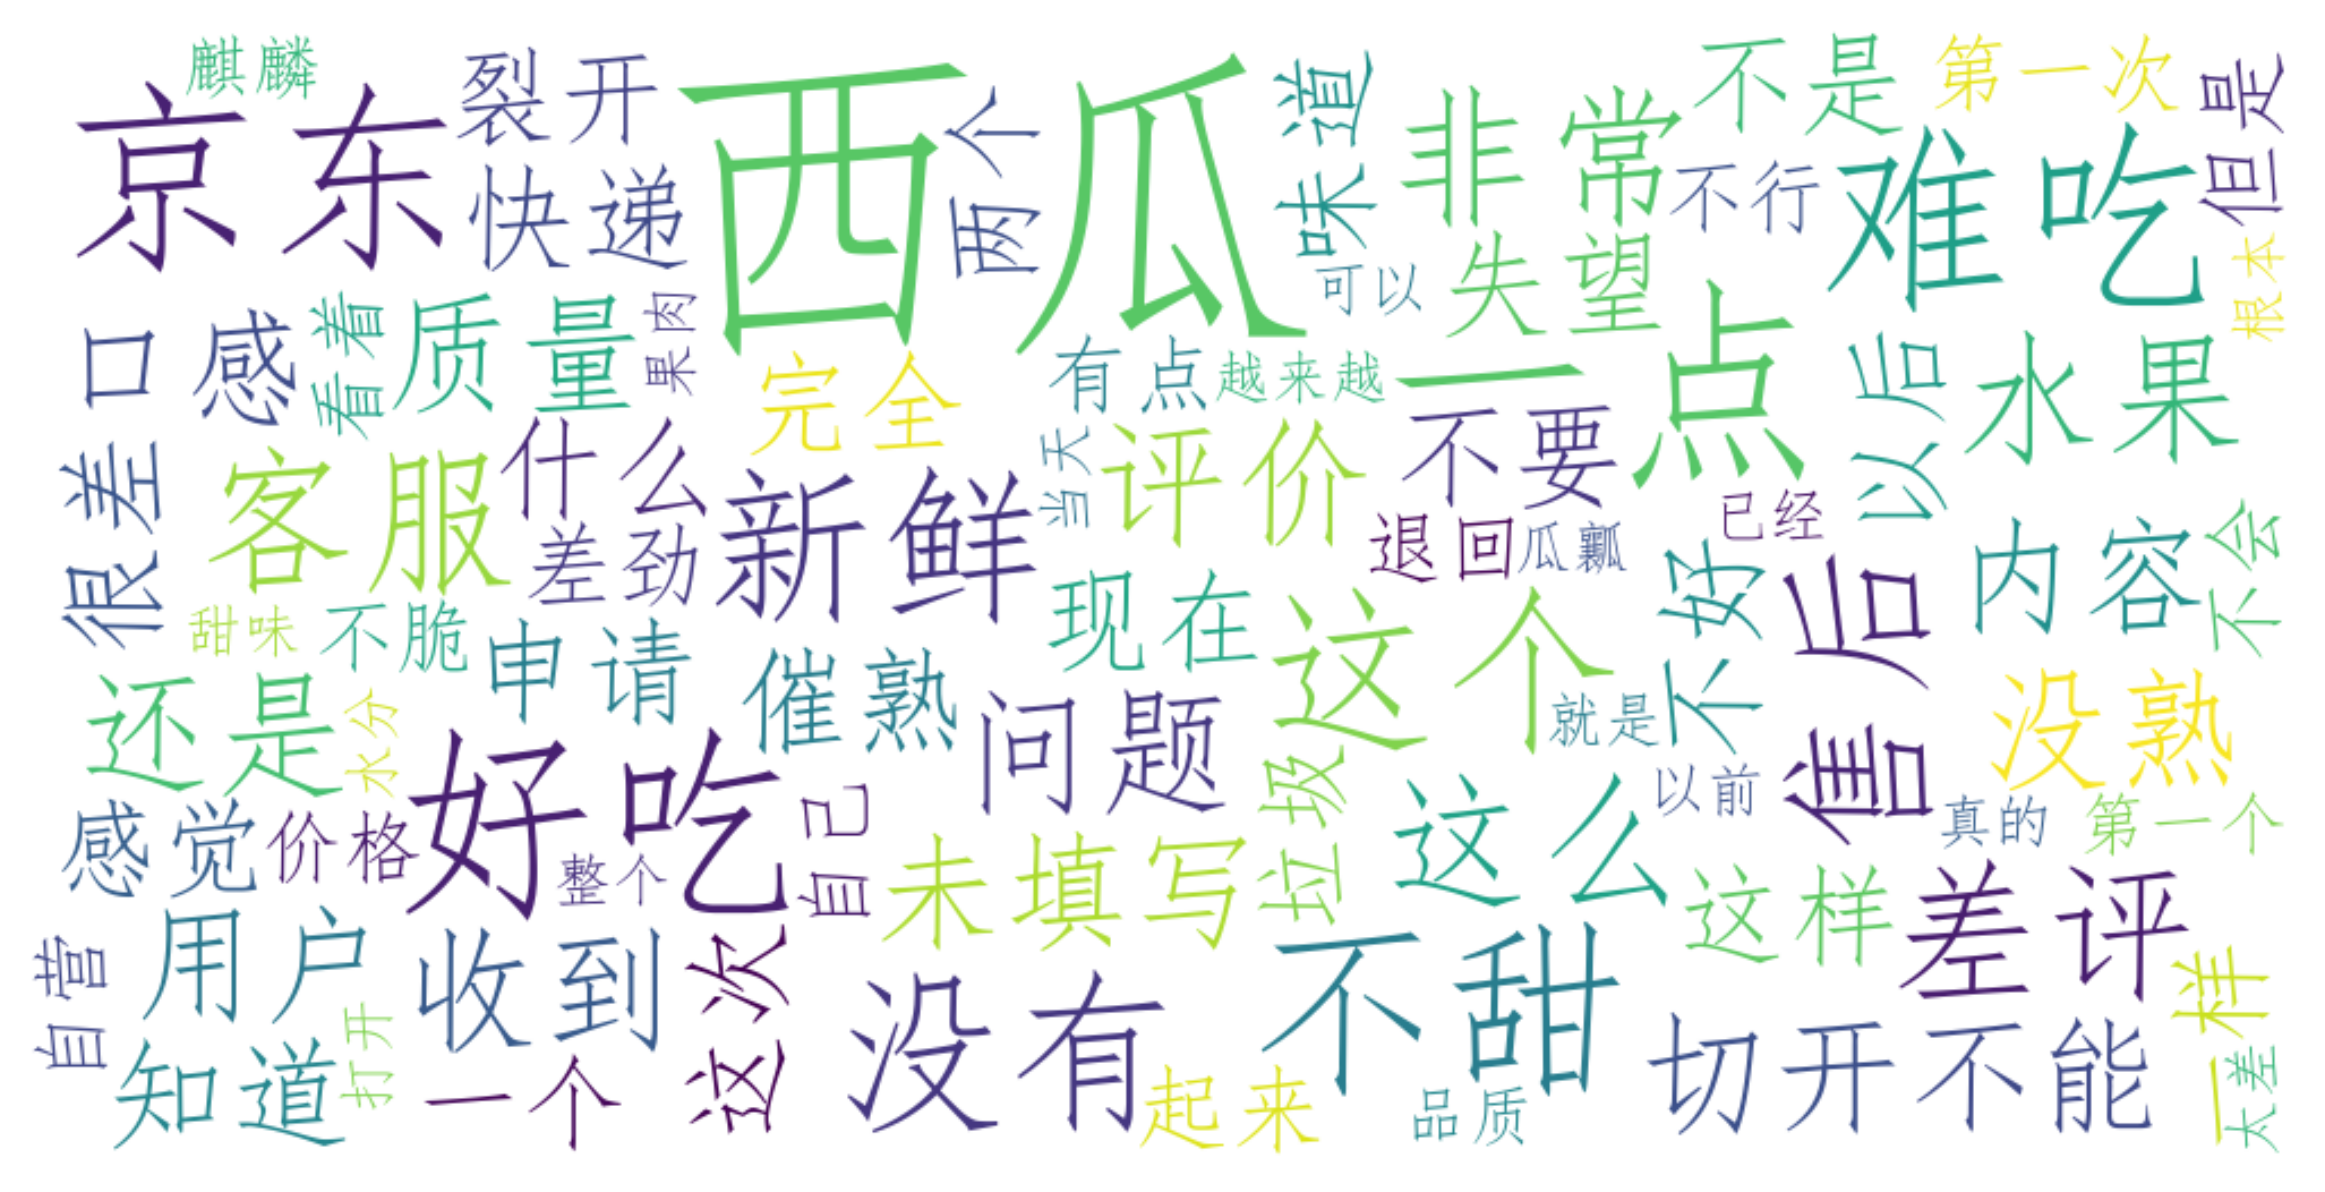

In [182]:
# 不同评分的词云图


# 创建WordCloud对象，并设置参数
wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf', width=1000, height=500, background_color='white', colormap='viridis', max_words=80, max_font_size=150, random_state=42)

# 生成词云图
wordcloud.generate_from_frequencies(word_counts)

# Convert the WordCloud object to SVG format
svg_content = wordcloud.to_svg()

# Save the SVG content to a file
with open('./img/词云.svg', 'w', encoding='utf-8') as f:
    f.write(svg_content)

# 绘制词云图
plt.figure(figsize=(10, 5), dpi=300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# 保存为本地SVG图像文件
plt.show()

In [184]:
def plot_wordcloud(comments_list, save_path, pos_tags=None):
    # 加载形状图片
    # mask_image = np.array(Image.open(mask_image_path))
    seg_list = [jp.lcut(comment) for comment in comments_list]
    # 过滤出长度大于一的字符，并根据指定词性进行过滤
    filtered_words = []
    for seq in seg_list:
        for word, pos in seq:
            if len(word) > 1 and (pos_tags is None or pos in pos_tags):
                filtered_words.append(word)
    # 统计词频
    word_counts = Counter(filtered_words)
    word_counts['hellip'] = 0
    # 不同评分的词云图
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

    # 创建WordCloud对象，并设置参数
    wordcloud = WordCloud(font_path=r'C:\Windows\Fonts\simfang.ttf', width=800, height=400, background_color='white', colormap='viridis', max_words=80, max_font_size=150, random_state=42)

    # 生成词云图
    wordcloud.generate_from_frequencies(word_counts)

    # Convert the WordCloud object to SVG format
    svg_content = wordcloud.to_svg()

    # Save the SVG content to a file
    with open(save_path, 'w', encoding='utf-8') as f:
        f.write(svg_content)
    # 绘制词云图
    plt.figure(figsize=(10, 5), dpi=500)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # 保存为本地SVG图像文件
    # plt.savefig(save_path, dpi=500)
    plt.close()

In [185]:
# pos_tags = {'a': '形容词', 'n': '名词', 'v': '动词', 'd': '副词', 's': '情感词', 'r': '代词'}
for score in range(1,6):
    comments_list = comments_df.loc[comments_df.score == score]['content'].to_list()
    save_path = rf'./img/{score}_词云.svg'
    plot_wordcloud(comments_list,save_path,pos_tags=['a','n','s','v'])